In [2]:
import sweetviz
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Reading

In [3]:
Data = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ZeroFilledSellout.csv"))
Data = Data.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Sales" : "Shipment"})


In [4]:
Data1 = Data[['SKU','Time','Date','Shipment']]
Data1

SKU    Time        Date  Shipment
0      100000015  W40-19  2019-10-07     0.000
1      100000017  W40-19  2019-10-07     5.000
2      100000019  W40-19  2019-10-07  1003.000
3      100000020  W40-19  2019-10-07   291.000
4      100000030  W40-19  2019-10-07    31.000
...          ...     ...         ...       ...
59503  100187432  W52-20  2020-12-28    14.314
59504  100187433  W52-20  2020-12-28    18.034
59505  100187434  W52-20  2020-12-28     2.152
59506  100187436  W52-20  2020-12-28    67.348
59507  100187846  W52-20  2020-12-28     6.110

[59508 rows x 4 columns]

## Glance View

In [5]:
GlanceView = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","GlanceView.csv"))
GlanceView = GlanceView.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Glance View PW" : "GlanceView"})
GlanceView

Version.[Version Name]    Time        SKU  GlanceView
0         CurrentWorkingView  W01-20  100160486           0
1         CurrentWorkingView  W02-20  100160486           0
2         CurrentWorkingView  W03-20  100160486           0
3         CurrentWorkingView  W04-20  100160486           0
4         CurrentWorkingView  W05-20  100160486           0
...                      ...     ...        ...         ...
34338     CurrentWorkingView  W36-20  100186806         181
34339     CurrentWorkingView  W37-20  100186806         273
34340     CurrentWorkingView  W38-20  100186806         349
34341     CurrentWorkingView  W39-20  100186806         321
34342     CurrentWorkingView  W40-20  100186806         300

[34343 rows x 4 columns]

## Lag Function

In [6]:
def create_lag_variables(df, date_column, grouped_on, shifting_var
                         , month_ascending=True, lag_vars_range = list()):
    """
    Function to create lag-variables    
    Parameters
    ----------
    df : pandas dataframe
        DESCRIPTION. Containing column names like month, banner_id, sku_id and actual_quantity.
    lag_vars_range : list, not optional
        DESCRIPTION. Pass a set of integers which will then generate the individual
        lag variables.

    Returns
    -------
    df : updated pandas dataframe with lag variables
        The passed dataframe is updated with the set of lag-variables 
        as passed to lag_vars_range

    """
    for lag in lag_vars_range:
        df[shifting_var+'lag_'+str(lag)] = (df
                               .sort_values(by = date_column, ascending = month_ascending)
                               .groupby(grouped_on)[shifting_var].shift(lag)
                               .fillna(0))
    return df

In [7]:
Data1 = pd.merge(Data1, GlanceView[['SKU','Time','GlanceView']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date  Shipment  GlanceView
0      100000015  W40-19  2019-10-07     0.000         NaN
1      100000017  W40-19  2019-10-07     5.000         NaN
2      100000019  W40-19  2019-10-07  1003.000         NaN
3      100000020  W40-19  2019-10-07   291.000         NaN
4      100000030  W40-19  2019-10-07    31.000         NaN
...          ...     ...         ...       ...         ...
59503  100187432  W52-20  2020-12-28    14.314         NaN
59504  100187433  W52-20  2020-12-28    18.034         NaN
59505  100187434  W52-20  2020-12-28     2.152         NaN
59506  100187436  W52-20  2020-12-28    67.348         NaN
59507  100187846  W52-20  2020-12-28     6.110         NaN

[59508 rows x 5 columns]

In [8]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="GlanceView",month_ascending=True,lag_vars_range=[1,2,3,4])

In [9]:
#Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="GlanceView",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "GlanceView_Lag1","lag_2" : "GlanceView_Lag2", "lag_3" :"GlanceView_Lag3","lag_4" :"GlanceView_Lag4"})
Data1

SKU    Time        Date  Shipment  GlanceView  GlanceViewlag_1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  
0                  0.0              0.0              0.0  
1                  0.0              0.0              0.0  
2                  0.0              0.0              0.0  
3                  0.0              0.0              0.0  
4                  0.0              0.0              0.0  
...                ...              ...              ...  
59503              0.0              0.0              0.0  
59504              0.0              0.0              0.0  
59505              0.0              0.0              0.0  
59506              0.0              0.0              0.0  
59507              0.0              0.0              0.0  

[59508 rows x 9 columns]

In [10]:
pearson = Data1.corr(method='pearson')
pearson

SKU  Shipment  GlanceView  GlanceViewlag_1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Shipment        -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceViewlag_1 -0.140606  0.631111    0.906504         1.000000   
GlanceViewlag_2 -0.140606  0.603559    0.838603         0.895576   
GlanceViewlag_3 -0.140606  0.597858    0.799177         0.818767   
GlanceViewlag_4 -0.140606  0.593198    0.762434         0.770660   

                 GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  
SKU                    -0.140606        -0.140606        -0.140606  
Shipment                0.603559         0.597858         0.593198  
GlanceView              0.838603         0.799177         0.762434  
GlanceViewlag_1         0.895576         0.818767         0.770660  
GlanceViewlag_2         1.000000         0.895576         0.818767  
GlanceViewlag_3         0.895576         1.000000         0.895576  
GlanceViewlag_4         0.818767         0.895576         1.000000

<AxesSubplot:>

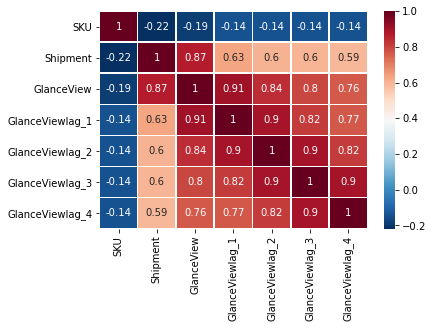

In [11]:
import seaborn as sb
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## Out of Stock

In [12]:
OOS = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","OutOfStockData.csv"))
OOS = OOS.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Rep OOS PW" : "OOS","Rep OOS% PW" : "OOS%"})
OOS.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'OOS', 'OOS%'], dtype='object')

In [13]:
Data1 = pd.merge(Data1, OOS[['SKU','Time','OOS','OOS%']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date  Shipment  GlanceView  GlanceViewlag_1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  OOS  OOS%  
0                  0.0              0.0              0.0  NaN   NaN  
1                  0.0              0.0              0.0  NaN   NaN  
2                  0.0              0.0              0.0  NaN   NaN  
3                  0.0              0.0              0.0  NaN   NaN  
4                  0.0              0.0              0.0  NaN   NaN  
...                ...              ...              ...  ...   ...  
59503              0.0              0.0              0.0  NaN   NaN  
59504              0.0              0.0              0.0  NaN   NaN  
59505              0.0              0.0              0.0  NaN   NaN  
59506              0.0              0.0              0.0  NaN   NaN  
59507              0.0              0.0              0.0  NaN   NaN  

[59508 rows x 11 columns]

In [14]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS",month_ascending=True,lag_vars_range=[1,2,3,4])

In [15]:
Data1 = Data1.rename(columns={"lag_1": "OOS_Lag1","lag_2" : "OOS_Lag2", "lag_3" :"OOS_Lag3","lag_4" :"OOS_Lag4"})
Data1

SKU    Time        Date  Shipment  GlanceView  GlanceViewlag_1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  OOS  OOS%  OOSlag_1  \
0                  0.0              0.0              0.0  NaN   NaN       0.0   
1                  0.0              0.0              0.0  NaN   NaN       0.0   
2                  0.0              0.0              0.0  NaN   NaN       0.0   
3                  0.0              0.0              0.0  NaN   NaN       0.0   
4                  0.0              0.0              0.0  NaN   NaN       0.0   
...                ...              ...              ...  ...   ...       ...   
59503              0.0              0.0              0.0  NaN   NaN       0.0   
59504              0.0              0.0              0.0  NaN   NaN       0.0   
59505              0.0              0.0              0.0  NaN   NaN       0.0   
59506              0.0              0.0              0.0  NaN   NaN       0.0   
59507              0.0              0.0              0.0  NaN   NaN       0.0   

       OOSlag_2  OOSlag_3  OOSlag_4  
0           0.0       0.0       0.0  
1           0.0       0.0       0.0  
2           0.0       0.0       0.0  
3           0.0       0.0       0.0  
4           0.0       0.0       0.0  
...         ...       ...       ...  
59503       0.0       0.0       0.0  
59504       0.0       0.0       0.0  
59505       0.0       0.0       0.0  
59506       0.0       0.0       0.0  
59507       0.0       0.0       0.0  

[59508 rows x 15 columns]

In [16]:
pearson = Data1.corr(method='pearson')
pearson

SKU  Shipment  GlanceView  GlanceViewlag_1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Shipment        -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceViewlag_1 -0.140606  0.631111    0.906504         1.000000   
GlanceViewlag_2 -0.140606  0.603559    0.838603         0.895576   
GlanceViewlag_3 -0.140606  0.597858    0.799177         0.818767   
GlanceViewlag_4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOSlag_1        -0.110798  0.448493    0.540161         0.591558   
OOSlag_2        -0.110798  0.449718    0.519965         0.537120   
OOSlag_3        -0.110798  0.461656    0.502460         0.501892   
OOSlag_4        -0.110798  0.480687    0.483381         0.475634   

                 GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Shipment                0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceViewlag_1         0.895576         0.818767         0.770660  0.558660   
GlanceViewlag_2         1.000000         0.895576         0.818767  0.550340   
GlanceViewlag_3         0.895576         1.000000         0.895576  0.531088   
GlanceViewlag_4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOSlag_1                0.564601         0.545191         0.519196  0.690126   
OOSlag_2                0.591558         0.564601         0.545191  0.610002   
OOSlag_3                0.537120         0.591558         0.564601  0.562506   
OOSlag_4                0.501892         0.537120         0.591558  0.561994   

                     OOS%  OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  
Shipment        -0.064297  0.448493  0.449718  0.461656  0.480687  
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  
GlanceViewlag_1 -0.034256  0.591558  0.537120  0.501892  0.475634  
GlanceViewlag_2 -0.013970  0.564601  0.591558  0.537120  0.501892  
GlanceViewlag_3 -0.002121  0.545191  0.564601  0.591558  0.537120  
GlanceViewlag_4  0.005579  0.519196  0.545191  0.564601  0.591558  
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980  
OOSlag_1         0.102741  1.000000  0.674720  0.582211  0.526620  
OOSlag_2         0.089948  0.674720  1.000000  0.674720  0.582211  
OOSlag_3         0.075517  0.582211  0.674720  1.000000  0.674720  
OOSlag_4         0.065980  0.526620  0.582211  0.674720  1.000000

In [17]:
# import seaborn as sb
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(8,8))
# sb.heatmap(pearson, 
#             xticklabels=pearson.columns,
#             yticklabels=pearson.columns,
#             cmap='RdBu_r',
#             annot=True,linewidths=0.5, ax=ax)

In [18]:
# Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="OOS%",month_ascending=True,lag_vars_range=[1,2,3,4])
# Data1.columns

In [19]:
# Data1 = Data1.rename(columns={"lag_1": "OOS%_Lag1","lag_2" : "OOS%_Lag2", "lag_3" :"OOS%_Lag3","lag_4" :"OOS%_Lag4"})
# Data1.columns

# LBB Price

In [20]:
LBB = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","LBB_Price_Data.csv"))
LBB = LBB.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","LBB Price" : "LBB_Price"})
LBB.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'LBB_Price'], dtype='object')

In [21]:
Data1 = pd.merge(Data1, LBB[['SKU','Time','LBB_Price']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date  Shipment  GlanceView  GlanceViewlag_1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  OOS  OOS%  OOSlag_1  \
0                  0.0              0.0              0.0  NaN   NaN       0.0   
1                  0.0              0.0              0.0  NaN   NaN       0.0   
2                  0.0              0.0              0.0  NaN   NaN       0.0   
3                  0.0              0.0              0.0  NaN   NaN       0.0   
4                  0.0              0.0              0.0  NaN   NaN       0.0   
...                ...              ...              ...  ...   ...       ...   
59503              0.0              0.0              0.0  NaN   NaN       0.0   
59504              0.0              0.0              0.0  NaN   NaN       0.0   
59505              0.0              0.0              0.0  NaN   NaN       0.0   
59506              0.0              0.0              0.0  NaN   NaN       0.0   
59507              0.0              0.0              0.0  NaN   NaN       0.0   

       OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  
0           0.0       0.0       0.0   0.000000  
1           0.0       0.0       0.0   0.800000  
2           0.0       0.0       0.0   0.000000  
3           0.0       0.0       0.0   0.001835  
4           0.0       0.0       0.0   0.000000  
...         ...       ...       ...        ...  
59503       0.0       0.0       0.0        NaN  
59504       0.0       0.0       0.0        NaN  
59505       0.0       0.0       0.0        NaN  
59506       0.0       0.0       0.0        NaN  
59507       0.0       0.0       0.0        NaN  

[59508 rows x 16 columns]

In [22]:
# import seaborn as sb
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(12,12))
# sb.heatmap(pearson, 
#             xticklabels=pearson.columns,
#             yticklabels=pearson.columns,
#             cmap='RdBu_r',
#             annot=True,linewidths=0.5, ax=ax)

In [23]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="LBB_Price",month_ascending=True,lag_vars_range=[1,2,3,4])


In [24]:
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4'],
      dtype='object')

In [25]:
Data1 = Data1.rename(columns={"lag_1": "LBBP_Lag1","lag_2" : "LBBP_Lag2", "lag_3" :"LBBP_Lag3","lag_4" :"LBBP_Lag4"})


In [26]:
pearson = Data1.corr(method='pearson')
pearson

SKU  Shipment  GlanceView  GlanceViewlag_1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Shipment        -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceViewlag_1 -0.140606  0.631111    0.906504         1.000000   
GlanceViewlag_2 -0.140606  0.603559    0.838603         0.895576   
GlanceViewlag_3 -0.140606  0.597858    0.799177         0.818767   
GlanceViewlag_4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOSlag_1        -0.110798  0.448493    0.540161         0.591558   
OOSlag_2        -0.110798  0.449718    0.519965         0.537120   
OOSlag_3        -0.110798  0.461656    0.502460         0.501892   
OOSlag_4        -0.110798  0.480687    0.483381         0.475634   
LBB_Price       -0.072761 -0.063174   -0.066172        -0.059809   
LBB_Pricelag_1  -0.070160 -0.050638   -0.061955        -0.039774   
LBB_Pricelag_2  -0.070160 -0.047547   -0.058672        -0.036286   
LBB_Pricelag_3  -0.070160 -0.044807   -0.056641        -0.033711   
LBB_Pricelag_4  -0.070160 -0.042768   -0.054740        -0.031416   

                 GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Shipment                0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceViewlag_1         0.895576         0.818767         0.770660  0.558660   
GlanceViewlag_2         1.000000         0.895576         0.818767  0.550340   
GlanceViewlag_3         0.895576         1.000000         0.895576  0.531088   
GlanceViewlag_4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOSlag_1                0.564601         0.545191         0.519196  0.690126   
OOSlag_2                0.591558         0.564601         0.545191  0.610002   
OOSlag_3                0.537120         0.591558         0.564601  0.562506   
OOSlag_4                0.501892         0.537120         0.591558  0.561994   
LBB_Price              -0.057551        -0.055683        -0.054566 -0.042691   
LBB_Pricelag_1         -0.038761        -0.038399        -0.038482 -0.037872   
LBB_Pricelag_2         -0.039774        -0.038761        -0.038399 -0.035238   
LBB_Pricelag_3         -0.036286        -0.039774        -0.038761 -0.034912   
LBB_Pricelag_4         -0.033711        -0.036286        -0.039774 -0.034312   

                     OOS%  OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  \
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  -0.072761   
Shipment        -0.064297  0.448493  0.449718  0.461656  0.480687  -0.063174   
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  -0.066172   
GlanceViewlag_1 -0.034256  0.591558  0.537120  0.501892  0.475634  -0.059809   
GlanceViewlag_2 -0.013970  0.564601  0.591558  0.537120  0.501892  -0.057551   
GlanceViewlag_3 -0.002121  0.545191  0.564601  0.591558  0.537120  -0.055683   
GlanceViewlag_4  0.005579  0.519196  0.545191  0.564601  0.591558  -0.054566   
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  -0.042691   
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980   0.000731   
OOSlag_1         0.102741  1.000000  0.674720  0.582211  0.526620  -0.030637   
OOSlag_2         0.089948  0.674720  1.000000  0.674720  0.582211  -0.028662   
OOSlag_3         0.075517  0.582211  0.674720  1.000000  0.674720  -0.024956   
OOSlag_4         0.065980  0.526620  0.582211  0.674720  1.000000  -0.019928   
LBB_Price        0.000731 -0.030637 -0.028662 -0.024956 -0.019928   1.000000   
LBB_Pric

<AxesSubplot:>

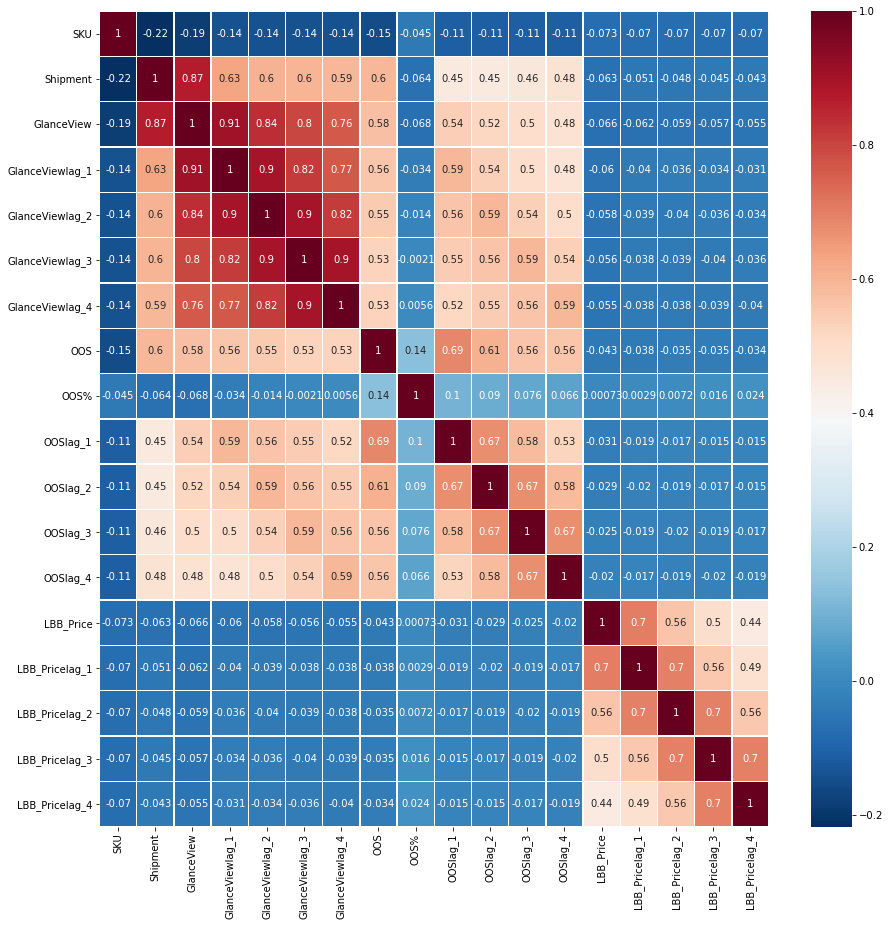

In [27]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

## For ILIActivity (Seasonal Flu)

# Conversion Percentage Data

In [28]:
ConvPerc = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ConversionPercentageData.csv"))
ConvPerc = ConvPerc.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Conversion% PW" : "ConvPerc"})
ConvPerc.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'ConvPerc'], dtype='object')

In [29]:
Data1 = pd.merge(Data1, ConvPerc[['SKU','Time','ConvPerc']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date  Shipment  GlanceView  GlanceViewlag_1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  OOS  ...  OOSlag_1  \
0                  0.0              0.0              0.0  NaN  ...       0.0   
1                  0.0              0.0              0.0  NaN  ...       0.0   
2                  0.0              0.0              0.0  NaN  ...       0.0   
3                  0.0              0.0              0.0  NaN  ...       0.0   
4                  0.0              0.0              0.0  NaN  ...       0.0   
...                ...              ...              ...  ...  ...       ...   
59503              0.0              0.0              0.0  NaN  ...       0.0   
59504              0.0              0.0              0.0  NaN  ...       0.0   
59505              0.0              0.0              0.0  NaN  ...       0.0   
59506              0.0              0.0              0.0  NaN  ...       0.0   
59507              0.0              0.0              0.0  NaN  ...       0.0   

       OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  LBB_Pricelag_1  \
0           0.0       0.0       0.0   0.000000             0.0   
1           0.0       0.0       0.0   0.800000             0.0   
2           0.0       0.0       0.0   0.000000             0.0   
3           0.0       0.0       0.0   0.001835             0.0   
4           0.0       0.0       0.0   0.000000             0.0   
...         ...       ...       ...        ...             ...   
59503       0.0       0.0       0.0        NaN             0.0   
59504       0.0       0.0       0.0        NaN             0.0   
59505       0.0       0.0       0.0        NaN             0.0   
59506       0.0       0.0       0.0        NaN             0.0   
59507       0.0       0.0       0.0        NaN             0.0   

       LBB_Pricelag_2  LBB_Pricelag_3  LBB_Pricelag_4  ConvPerc  
0                 0.0             0.0             0.0       NaN  
1                 0.0             0.0             0.0       NaN  
2                 0.0             0.0             0.0       NaN  
3                 0.0             0.0             0.0       NaN  
4                 0.0             0.0             0.0       NaN  
...               ...             ...             ...       ...  
59503             0.0             0.0             0.0  0.250000  
59504             0.0             0.0             0.0  0.207921  
59505             0.0             0.0             0.0  0.000000  
59506             0.0             0.0             0.0  0.322581  
59507             0.0             0.0             0.0  0.331647  

[59508 rows x 21 columns]

In [30]:
pearson = Data1.corr(method='pearson')
pearson

SKU  Shipment  GlanceView  GlanceViewlag_1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Shipment        -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceViewlag_1 -0.140606  0.631111    0.906504         1.000000   
GlanceViewlag_2 -0.140606  0.603559    0.838603         0.895576   
GlanceViewlag_3 -0.140606  0.597858    0.799177         0.818767   
GlanceViewlag_4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOSlag_1        -0.110798  0.448493    0.540161         0.591558   
OOSlag_2        -0.110798  0.449718    0.519965         0.537120   
OOSlag_3        -0.110798  0.461656    0.502460         0.501892   
OOSlag_4        -0.110798  0.480687    0.483381         0.475634   
LBB_Price       -0.072761 -0.063174   -0.066172        -0.059809   
LBB_Pricelag_1  -0.070160 -0.050638   -0.061955        -0.039774   
LBB_Pricelag_2  -0.070160 -0.047547   -0.058672        -0.036286   
LBB_Pricelag_3  -0.070160 -0.044807   -0.056641        -0.033711   
LBB_Pricelag_4  -0.070160 -0.042768   -0.054740        -0.031416   
ConvPerc        -0.023956  0.011541   -0.003210        -0.003443   

                 GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Shipment                0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceViewlag_1         0.895576         0.818767         0.770660  0.558660   
GlanceViewlag_2         1.000000         0.895576         0.818767  0.550340   
GlanceViewlag_3         0.895576         1.000000         0.895576  0.531088   
GlanceViewlag_4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOSlag_1                0.564601         0.545191         0.519196  0.690126   
OOSlag_2                0.591558         0.564601         0.545191  0.610002   
OOSlag_3                0.537120         0.591558         0.564601  0.562506   
OOSlag_4                0.501892         0.537120         0.591558  0.561994   
LBB_Price              -0.057551        -0.055683        -0.054566 -0.042691   
LBB_Pricelag_1         -0.038761        -0.038399        -0.038482 -0.037872   
LBB_Pricelag_2         -0.039774        -0.038761        -0.038399 -0.035238   
LBB_Pricelag_3         -0.036286        -0.039774        -0.038761 -0.034912   
LBB_Pricelag_4         -0.033711        -0.036286        -0.039774 -0.034312   
ConvPerc               -0.002371        -0.000634         0.000318  0.039457   

                     OOS%  OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  \
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  -0.072761   
Shipment        -0.064297  0.448493  0.449718  0.461656  0.480687  -0.063174   
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  -0.066172   
GlanceViewlag_1 -0.034256  0.591558  0.537120  0.501892  0.475634  -0.059809   
GlanceViewlag_2 -0.013970  0.564601  0.591558  0.537120  0.501892  -0.057551   
GlanceViewlag_3 -0.002121  0.545191  0.564601  0.591558  0.537120  -0.055683   
GlanceViewlag_4  0.005579  0.519196  0.545191  0.564601  0.591558  -0.054566   
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  -0.042691   
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980   0.000731   
OOSlag_1         0.102741  1.000000  0.674720  0.582211  0.526620  -0.030637   
OOSlag_2         0.089948  0.674720  1.000000  0.674720  0.582211  -0.028662   
OOSlag_3         0.075517  0.582211  0.674720  1.000000  0.674720  -0.024956   
OOSlag_4         0.0

<AxesSubplot:>

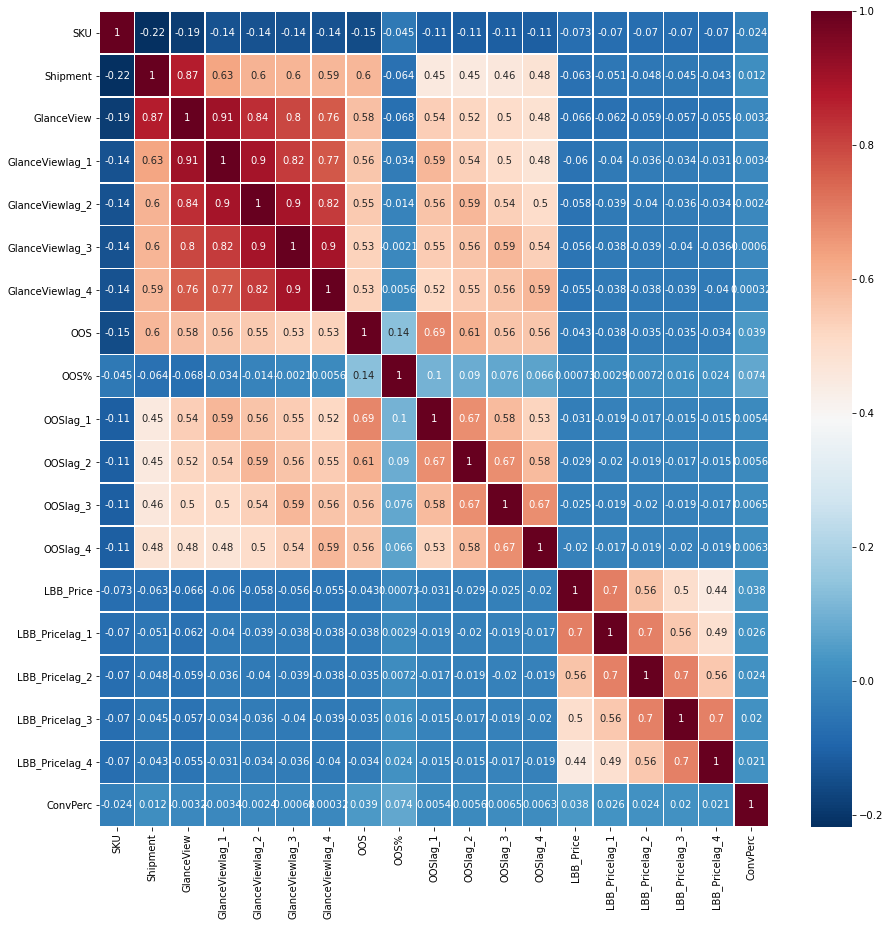

In [31]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# Channel Inventory

In [32]:
ChInv = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ChInvData.csv"))
ChInv = ChInv.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Ch INV PW" : "ChInv"})
ChInv.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'ChInv'], dtype='object')

In [33]:
Data1 = pd.merge(Data1, ChInv[['SKU','Time','ChInv']], how='left', on=['SKU','Time'])
Data1

SKU    Time        Date  Shipment  GlanceView  GlanceViewlag_1  \
0      100000015  W40-19  2019-10-07     0.000         NaN              0.0   
1      100000017  W40-19  2019-10-07     5.000         NaN              0.0   
2      100000019  W40-19  2019-10-07  1003.000         NaN              0.0   
3      100000020  W40-19  2019-10-07   291.000         NaN              0.0   
4      100000030  W40-19  2019-10-07    31.000         NaN              0.0   
...          ...     ...         ...       ...         ...              ...   
59503  100187432  W52-20  2020-12-28    14.314         NaN              0.0   
59504  100187433  W52-20  2020-12-28    18.034         NaN              0.0   
59505  100187434  W52-20  2020-12-28     2.152         NaN              0.0   
59506  100187436  W52-20  2020-12-28    67.348         NaN              0.0   
59507  100187846  W52-20  2020-12-28     6.110         NaN              0.0   

       GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4  OOS  ...  OOSlag_2  \
0                  0.0              0.0              0.0  NaN  ...       0.0   
1                  0.0              0.0              0.0  NaN  ...       0.0   
2                  0.0              0.0              0.0  NaN  ...       0.0   
3                  0.0              0.0              0.0  NaN  ...       0.0   
4                  0.0              0.0              0.0  NaN  ...       0.0   
...                ...              ...              ...  ...  ...       ...   
59503              0.0              0.0              0.0  NaN  ...       0.0   
59504              0.0              0.0              0.0  NaN  ...       0.0   
59505              0.0              0.0              0.0  NaN  ...       0.0   
59506              0.0              0.0              0.0  NaN  ...       0.0   
59507              0.0              0.0              0.0  NaN  ...       0.0   

       OOSlag_3  OOSlag_4  LBB_Price  LBB_Pricelag_1  LBB_Pricelag_2  \
0           0.0       0.0   0.000000             0.0             0.0   
1           0.0       0.0   0.800000             0.0             0.0   
2           0.0       0.0   0.000000             0.0             0.0   
3           0.0       0.0   0.001835             0.0             0.0   
4           0.0       0.0   0.000000             0.0             0.0   
...         ...       ...        ...             ...             ...   
59503       0.0       0.0        NaN             0.0             0.0   
59504       0.0       0.0        NaN             0.0             0.0   
59505       0.0       0.0        NaN             0.0             0.0   
59506       0.0       0.0        NaN             0.0             0.0   
59507       0.0       0.0        NaN             0.0             0.0   

       LBB_Pricelag_3  LBB_Pricelag_4  ConvPerc    ChInv  
0                 0.0             0.0       NaN      0.0  
1                 0.0             0.0       NaN    414.0  
2                 0.0             0.0       NaN   5350.0  
3                 0.0             0.0       NaN   3786.0  
4                 0.0             0.0       NaN    194.0  
...               ...             ...       ...      ...  
59503             0.0             0.0  0.250000     57.0  
59504             0.0             0.0  0.207921    117.0  
59505             0.0             0.0  0.000000     78.0  
59506             0.0             0.0  0.322581    256.0  
59507             0.0             0.0  0.331647  15354.0  

[59508 rows x 22 columns]

In [34]:
pearson = Data1.corr(method='pearson')
pearson

SKU  Shipment  GlanceView  GlanceViewlag_1  \
SKU              1.000000 -0.217508   -0.187799        -0.140606   
Shipment        -0.217508  1.000000    0.868879         0.631111   
GlanceView      -0.187799  0.868879    1.000000         0.906504   
GlanceViewlag_1 -0.140606  0.631111    0.906504         1.000000   
GlanceViewlag_2 -0.140606  0.603559    0.838603         0.895576   
GlanceViewlag_3 -0.140606  0.597858    0.799177         0.818767   
GlanceViewlag_4 -0.140606  0.593198    0.762434         0.770660   
OOS             -0.154880  0.595585    0.575695         0.558660   
OOS%            -0.045117 -0.064297   -0.068272        -0.034256   
OOSlag_1        -0.110798  0.448493    0.540161         0.591558   
OOSlag_2        -0.110798  0.449718    0.519965         0.537120   
OOSlag_3        -0.110798  0.461656    0.502460         0.501892   
OOSlag_4        -0.110798  0.480687    0.483381         0.475634   
LBB_Price       -0.072761 -0.063174   -0.066172        -0.059809   
LBB_Pricelag_1  -0.070160 -0.050638   -0.061955        -0.039774   
LBB_Pricelag_2  -0.070160 -0.047547   -0.058672        -0.036286   
LBB_Pricelag_3  -0.070160 -0.044807   -0.056641        -0.033711   
LBB_Pricelag_4  -0.070160 -0.042768   -0.054740        -0.031416   
ConvPerc        -0.023956  0.011541   -0.003210        -0.003443   
ChInv           -0.226288  0.707493    0.545748         0.375717   

                 GlanceViewlag_2  GlanceViewlag_3  GlanceViewlag_4       OOS  \
SKU                    -0.140606        -0.140606        -0.140606 -0.154880   
Shipment                0.603559         0.597858         0.593198  0.595585   
GlanceView              0.838603         0.799177         0.762434  0.575695   
GlanceViewlag_1         0.895576         0.818767         0.770660  0.558660   
GlanceViewlag_2         1.000000         0.895576         0.818767  0.550340   
GlanceViewlag_3         0.895576         1.000000         0.895576  0.531088   
GlanceViewlag_4         0.818767         0.895576         1.000000  0.533838   
OOS                     0.550340         0.531088         0.533838  1.000000   
OOS%                   -0.013970        -0.002121         0.005579  0.136717   
OOSlag_1                0.564601         0.545191         0.519196  0.690126   
OOSlag_2                0.591558         0.564601         0.545191  0.610002   
OOSlag_3                0.537120         0.591558         0.564601  0.562506   
OOSlag_4                0.501892         0.537120         0.591558  0.561994   
LBB_Price              -0.057551        -0.055683        -0.054566 -0.042691   
LBB_Pricelag_1         -0.038761        -0.038399        -0.038482 -0.037872   
LBB_Pricelag_2         -0.039774        -0.038761        -0.038399 -0.035238   
LBB_Pricelag_3         -0.036286        -0.039774        -0.038761 -0.034912   
LBB_Pricelag_4         -0.033711        -0.036286        -0.039774 -0.034312   
ConvPerc               -0.002371        -0.000634         0.000318  0.039457   
ChInv                   0.393176         0.417236         0.440393  0.364325   

                     OOS%  OOSlag_1  OOSlag_2  OOSlag_3  OOSlag_4  LBB_Price  \
SKU             -0.045117 -0.110798 -0.110798 -0.110798 -0.110798  -0.072761   
Shipment        -0.064297  0.448493  0.449718  0.461656  0.480687  -0.063174   
GlanceView      -0.068272  0.540161  0.519965  0.502460  0.483381  -0.066172   
GlanceViewlag_1 -0.034256  0.591558  0.537120  0.501892  0.475634  -0.059809   
GlanceViewlag_2 -0.013970  0.564601  0.591558  0.537120  0.501892  -0.057551   
GlanceViewlag_3 -0.002121  0.545191  0.564601  0.591558  0.537120  -0.055683   
GlanceViewlag_4  0.005579  0.519196  0.545191  0.564601  0.591558  -0.054566   
OOS              0.136717  0.690126  0.610002  0.562506  0.561994  -0.042691   
OOS%             1.000000  0.102741  0.089948  0.075517  0.065980   0.000731   
OOSlag_1         0.102741  1.000000  0.674720  0.582211  0.526620  -0.030637   
OOSlag_2         0.089948  0.674

In [35]:
# import seaborn as sb
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(16,16))
# sb.heatmap(pearson, 
#             xticklabels=pearson.columns,
#             yticklabels=pearson.columns,
#             cmap='RdBu_r',
#             annot=True,linewidths=0.5, ax=ax)

In [36]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="ChInv",month_ascending=True,lag_vars_range=[1,2,3,4])


In [37]:
Data1 = Data1.rename(columns={"lag_1": "ChInv_Lag1","lag_2" : "ChInv_Lag2", "lag_3" :"ChInv_Lag3","lag_4" :"ChInv_Lag4"})


In [38]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

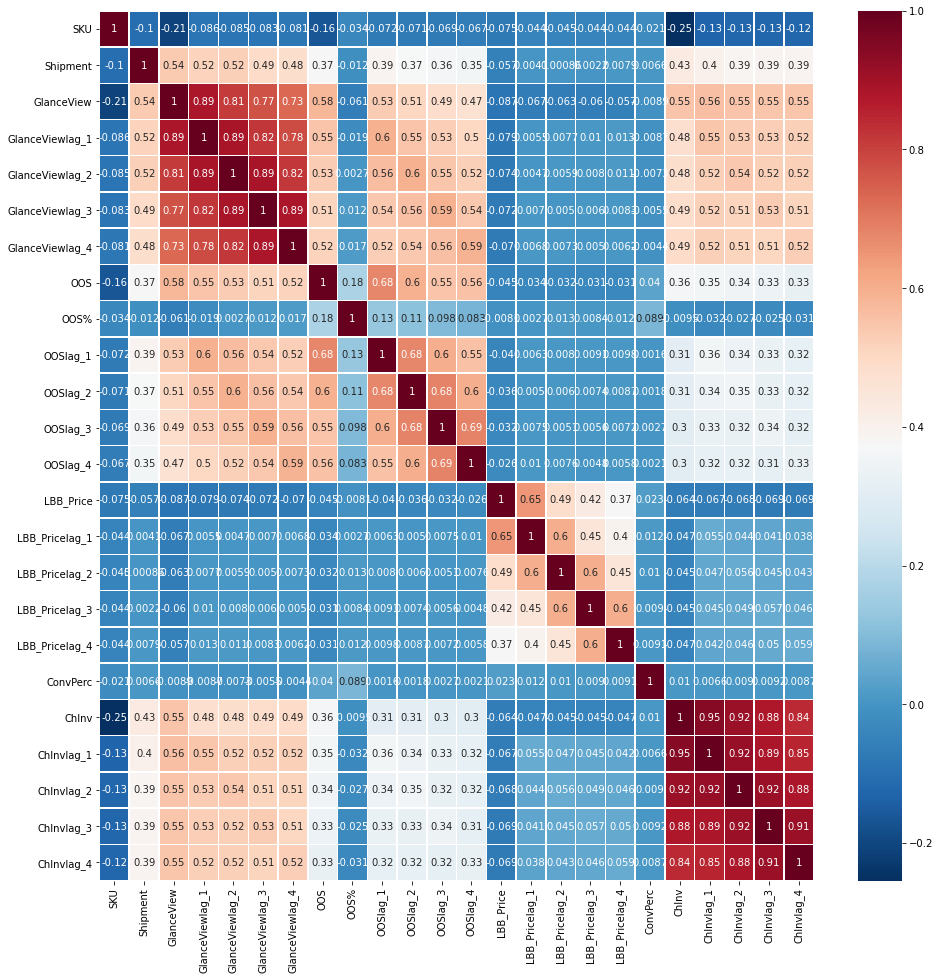

In [357]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,16))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# SubCategory Sales Rank, Shipped COGS, Units Data

In [39]:
AmzData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","COGS_Sales_Rank_Data.csv"))
AmzData = AmzData.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU"})
AmzData.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'Shipped COGS',
       'Shipped Units', 'Subcategory (Sales Rank)'],
      dtype='object')

In [40]:
Data1 = pd.merge(Data1, AmzData[['SKU','Time','Shipped COGS','Shipped Units','Subcategory (Sales Rank)']], how='left', on=['SKU','Time'])


In [41]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

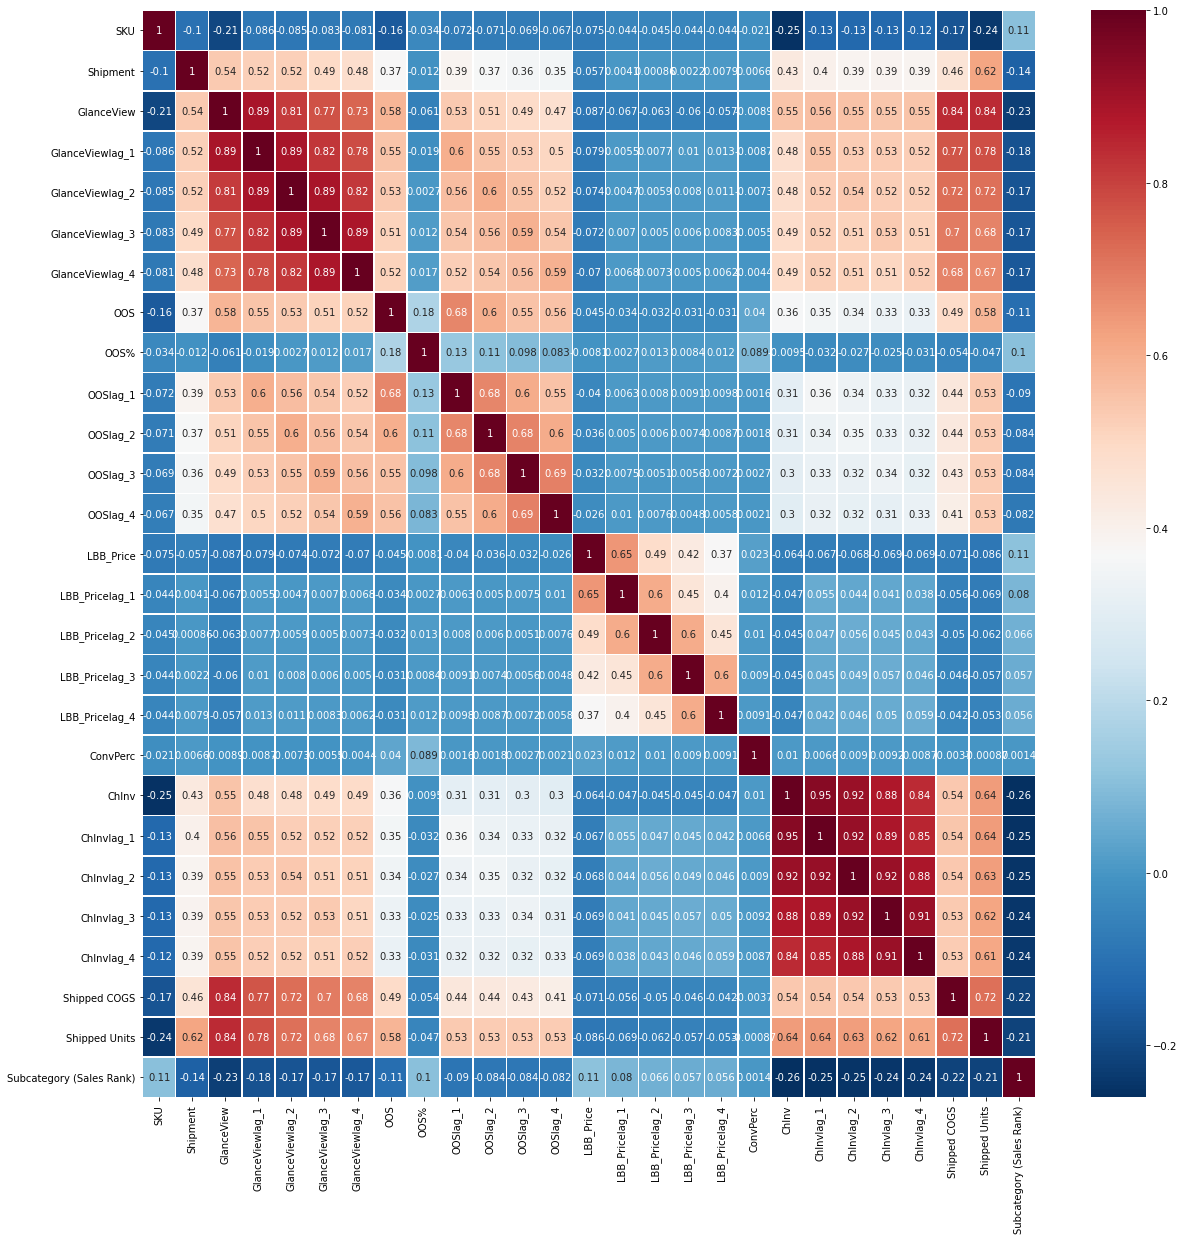

In [361]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# Amazon Data

In [42]:
AmazonData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","AmazonData.csv"))
AmazonData = AmazonData.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU"})
AmazonData.columns

Index(['Version.[Version Name]', 'Time', 'SKU', 'Customer Returns',
       'Free Replacements', 'Net Received Units', 'Sell-Through Rate',
       'Open Purchase Order Quantity', 'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV'],
      dtype='object')

In [43]:
AmazonData.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,AmazonData , how='left', on=['SKU','Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV'],
      dtype='object')

In [44]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

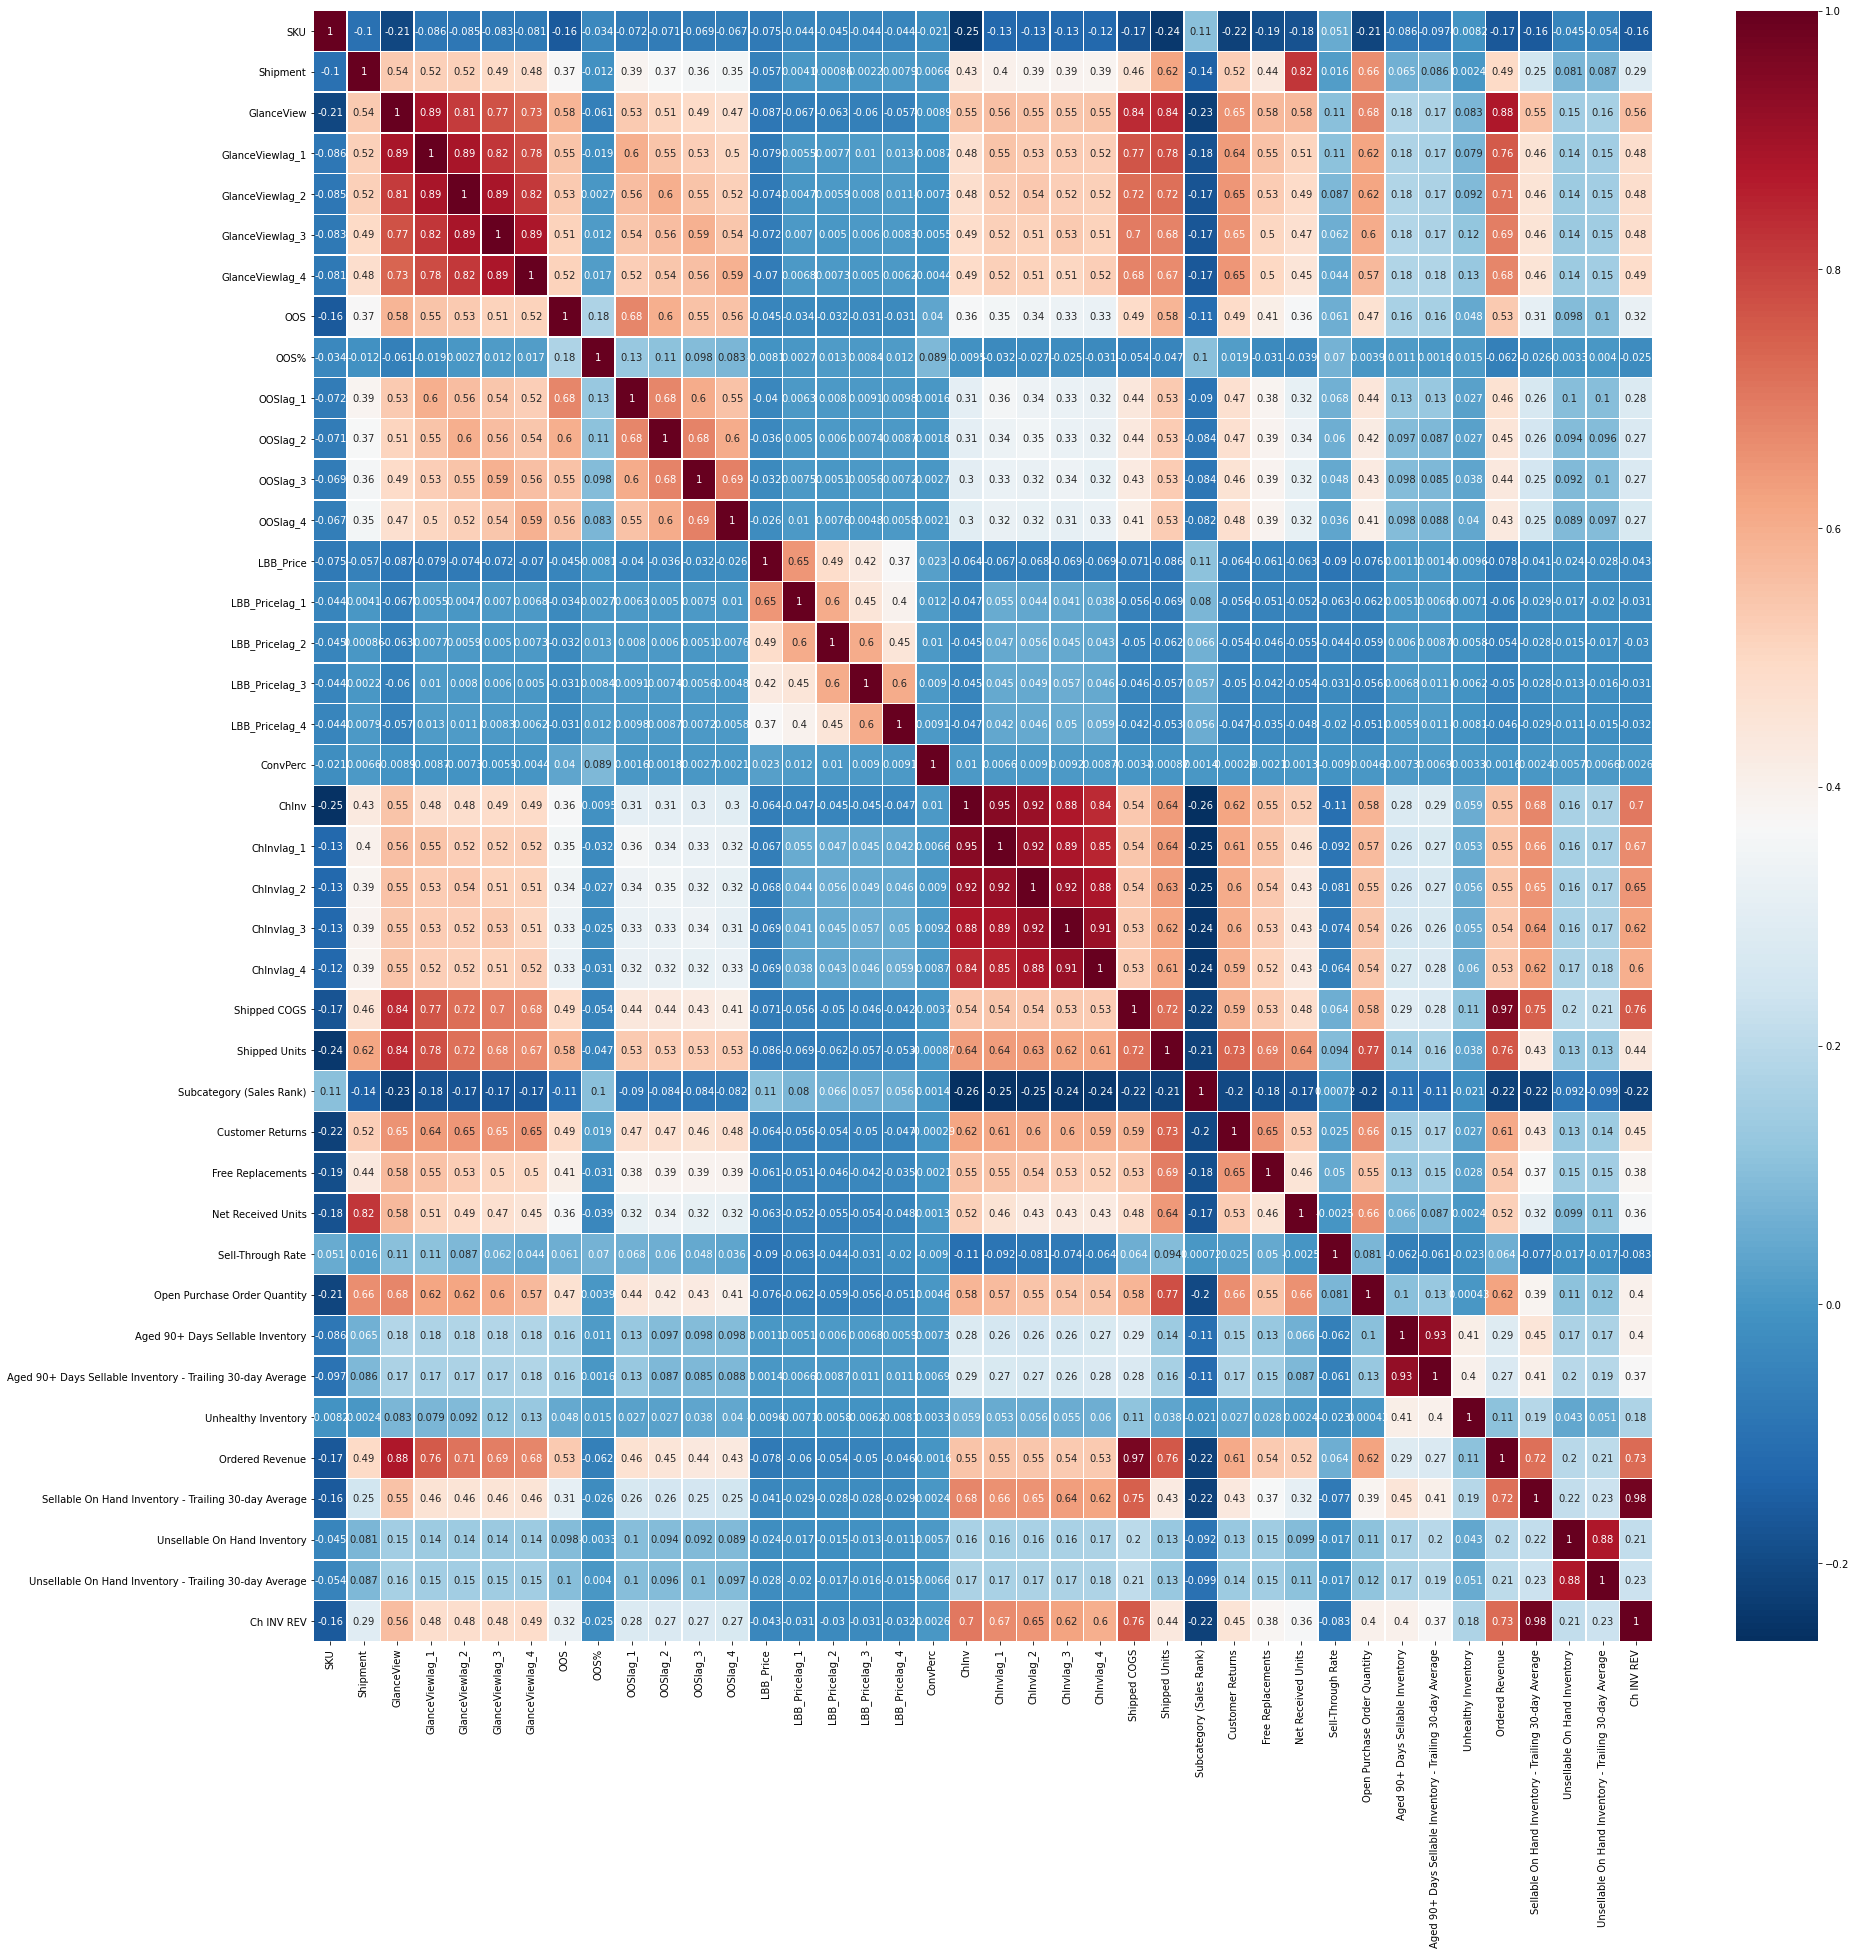

In [365]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [211]:
# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [157]:
pearson.to_csv("Shipment_Correlation_Analysis.csv")

In [158]:
pearson

SKU  Shipment  \
SKU                                                 1.000000 -0.102507   
Shipment                                           -0.102507  1.000000   
GlanceView                                         -0.205146  0.536524   
GlanceView_Lag1                                    -0.086087  0.519774   
GlanceView_Lag2                                    -0.084614  0.521981   
GlanceView_Lag3                                    -0.082839  0.494118   
GlanceView_Lag4                                    -0.081321  0.482801   
OOS                                                -0.161294  0.374227   
OOS%                                               -0.034290 -0.012284   
OOS_Lag1                                           -0.071586  0.387963   
OOS_Lag2                                           -0.071088  0.368675   
OOS_Lag3                                           -0.068924  0.359409   
OOS_Lag4                                           -0.067188  0.354162   
LBB_Price                                          -0.075380 -0.057241   
LBBP_Lag1                                          -0.044271  0.004113   
LBBP_Lag2                                          -0.044503  0.000865   
LBBP_Lag3                                          -0.044179  0.002187   
LBBP_Lag4                                          -0.044311  0.007929   
ConvPerc                                           -0.021093  0.006610   
ChInv                                              -0.254100  0.429968   
ChInv_Lag1                                         -0.127511  0.403861   
ChInv_Lag2                                         -0.126346  0.387262   
ChInv_Lag3                                         -0.125083  0.390235   
ChInv_Lag4                                         -0.123826  0.388922   
Shipped COGS                                       -0.172293  0.457194   
Shipped Units                                      -0.236184  0.617199   
Subcategory (Sales Rank)                            0.106516 -0.143544   
Customer Returns                                   -0.220087  0.524171   
Free Replacements                                  -0.189419  0.436187   
Net Received Units                                 -0.181770  0.820019   
Sell-Through Rate                                   0.051189  0.016247   
Open Purchase Order Quantity                       -0.209670  0.662819   
Aged 90+ Days Sellable Inventory                   -0.086474  0.064885   
Aged 90+ Days Sellable Inventory - Trailing 30-... -0.097165  0.086297   
Unhealthy Inventory                                -0.008170  0.002395   
Ordered Revenue                                    -0.166508  0.494327   
Sellable On Hand Inventory - Trailing 30-day Av... -0.161952  0.250324   
Unsellable On Hand Inventory                       -0.044779  0.081231   
Unsellable On Hand Inventory - Trailing 30-day ... -0.053607  0.087238   
Ch INV REV                                         -0.161729  0.292340   

                                                    GlanceView  \
SKU                                                  -0.205146   
Shipment                                              0.536524   
GlanceView                                            1.000000   
GlanceView_Lag1                                       0.886950   
GlanceView_Lag2                                       0.812583   
GlanceView_Lag3                                       0.771224   
GlanceView_Lag4                                       0.734157   
OOS                                                   0.581460   
OOS%                                                 -0.061084   
OOS_Lag1                                              0.533828   
OOS_Lag2                                              0.509377   
OOS_Lag3                                              0.488769   
OOS_Lag4                                              0.470423   
LBB_Price                                            -0.087486   
LBBP_Lag1                       

# Customer Promo

In [45]:
CustomerPromo = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","CustomerPromo.csv"))
CustomerPromo = CustomerPromo.rename(columns={"Time.[Week]": "Time", "Item.[Planning Item]":"SKU","Price Discount% Day":"CustomerPromo"})
CustomerPromo.columns

Index(['Promotion.[Promotion ID]', 'Version.[Version Name]', 'Time', 'SKU',
       'CustomerPromo'],
      dtype='object')

In [46]:
CustomerPromo.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,CustomerPromo , how='left', on=['SKU','Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [47]:
pearson = Data1.corr(method='pearson')


In [48]:
pearson.to_csv("Shipment_Correlation_Analysis_CustomerPromo.csv")

<AxesSubplot:>

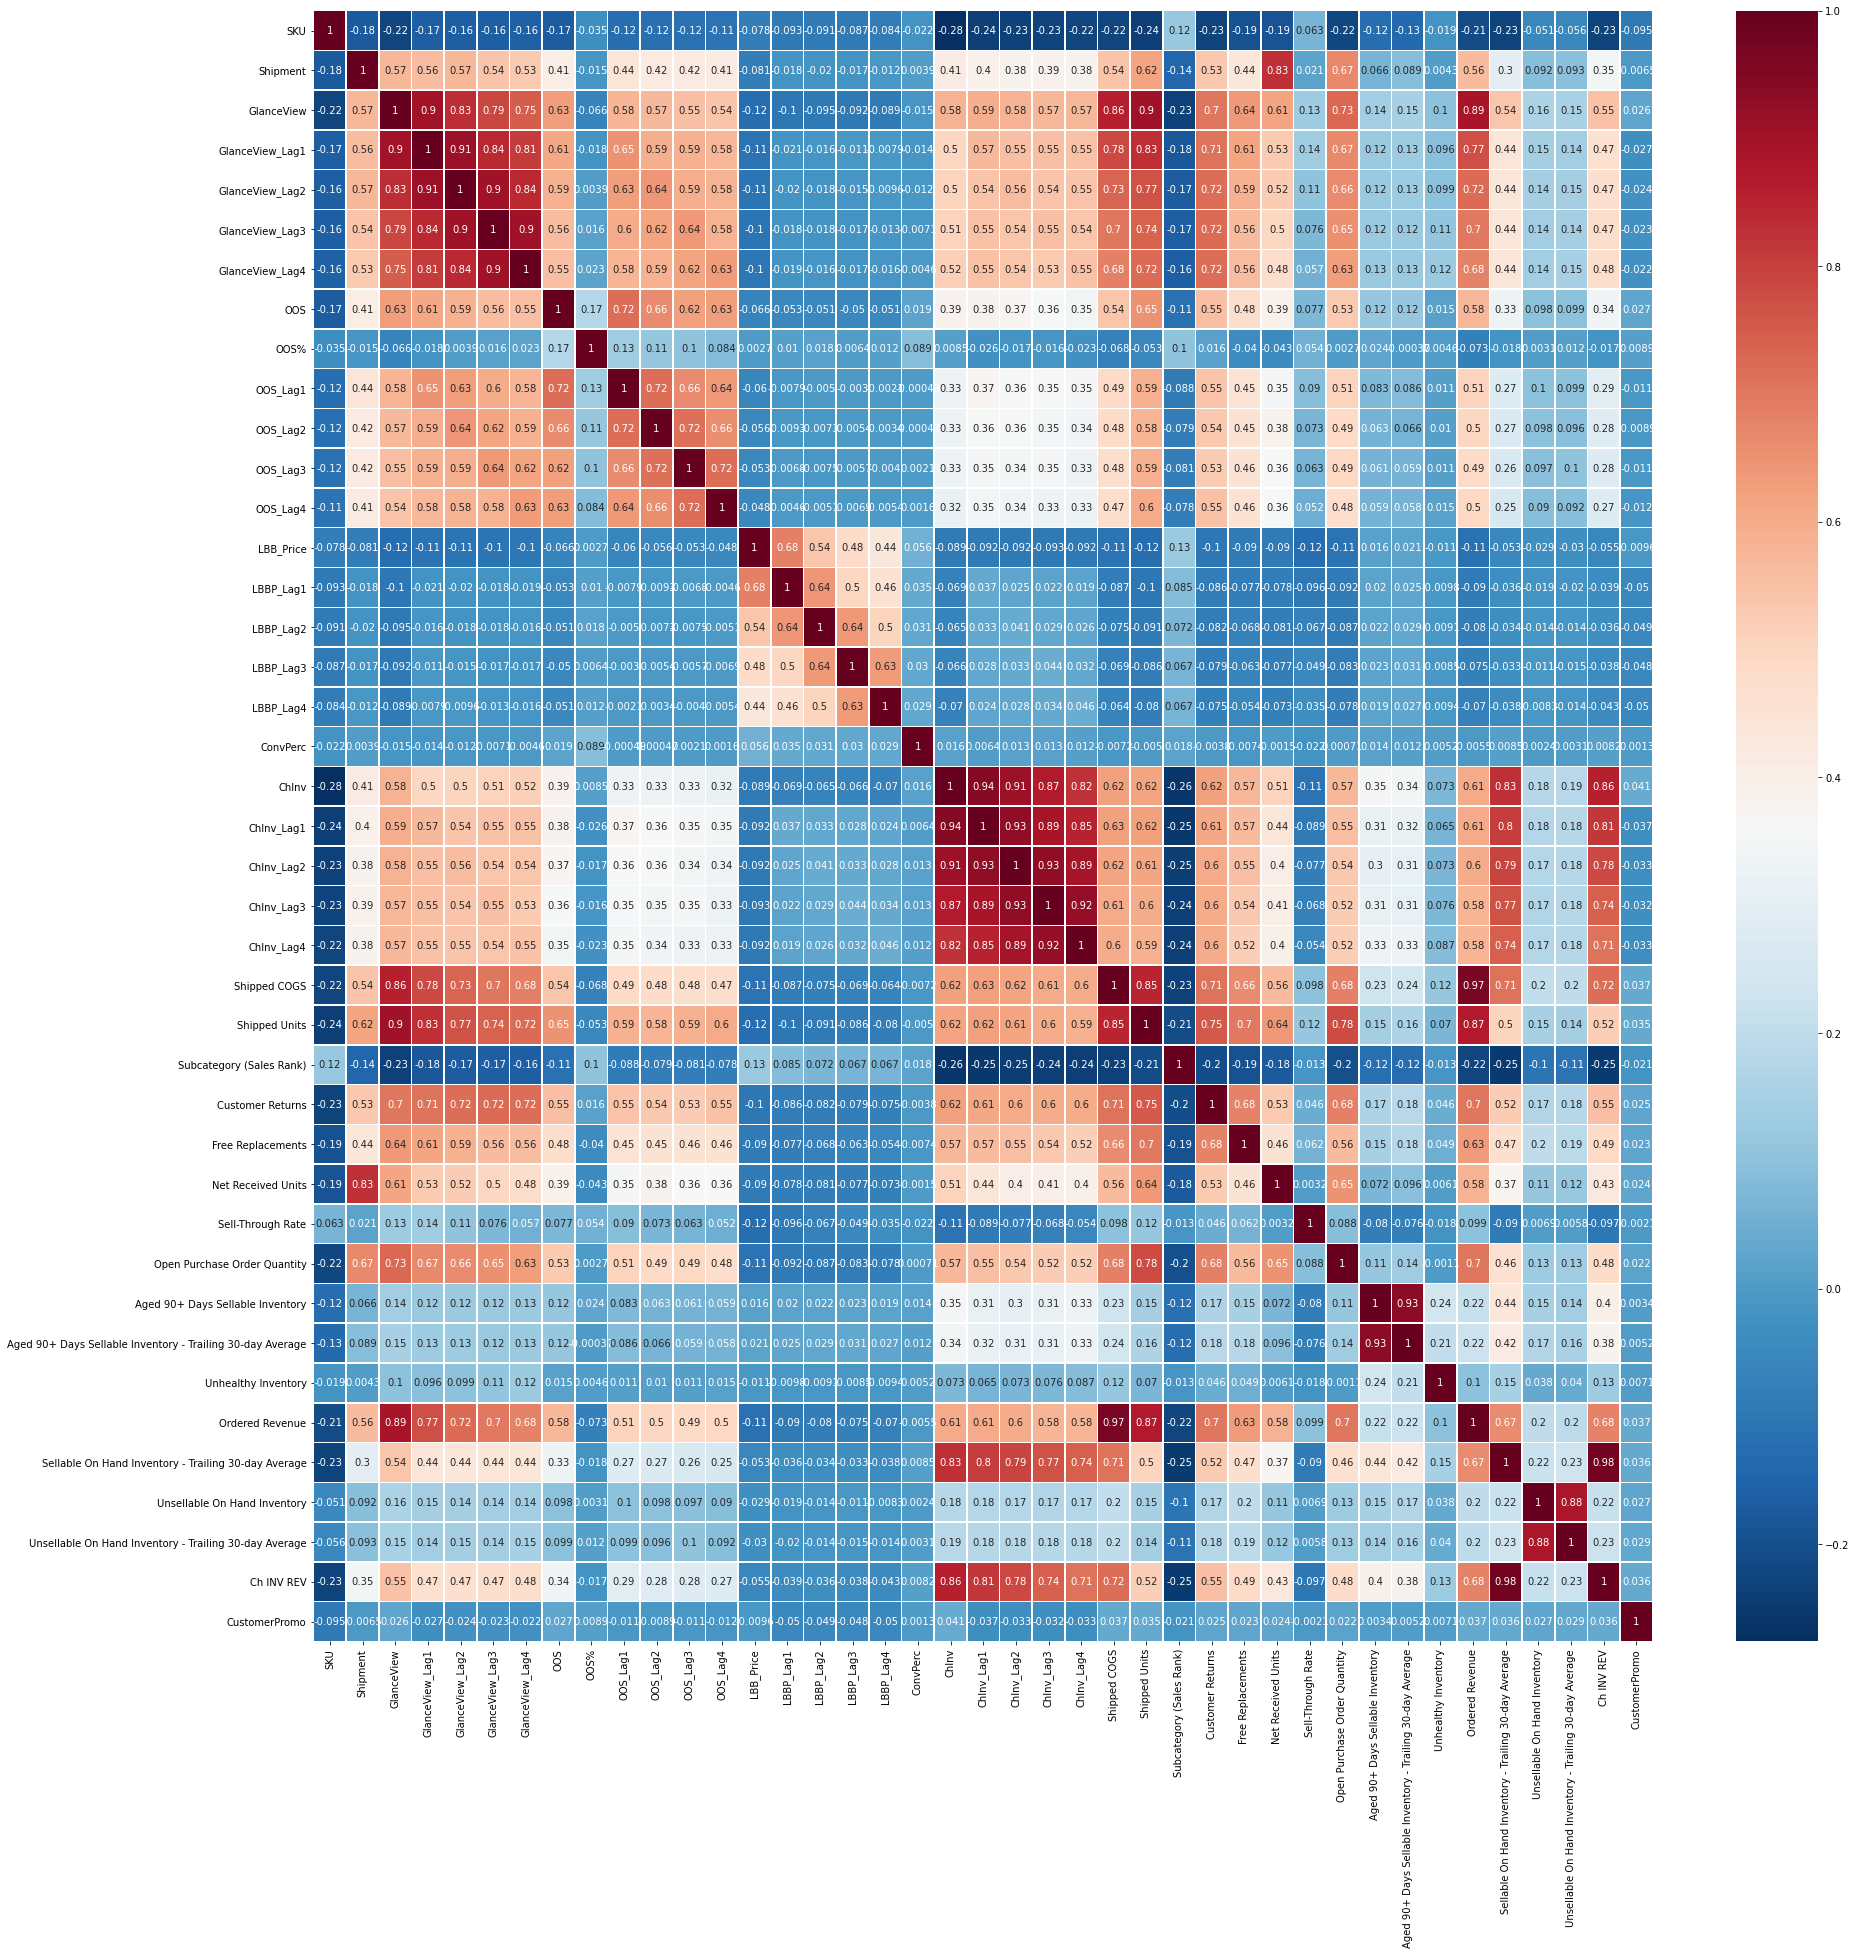

In [163]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

# ILI Activity Level

In [49]:
ILIData = pd.read_csv(os.path.join("C:/Users/kadambini.indurkar/NBTY/Data","Correlation Analysis/","ILIActivityData.csv"))
ILIData = ILIData.rename(columns={"Time.[Week]": "Time","ILI Activity Level PW":"ILIActivity"})
ILIData.columns

Index(['Version.[Version Name]', 'Time', 'ILIActivity'], dtype='object')

In [50]:
ILIData.drop(['Version.[Version Name]'], axis=1)
Data1 = pd.merge(Data1,ILIData , how='left', on=['Time'])
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [371]:
pearson = Data1.corr(method='pearson')


<AxesSubplot:>

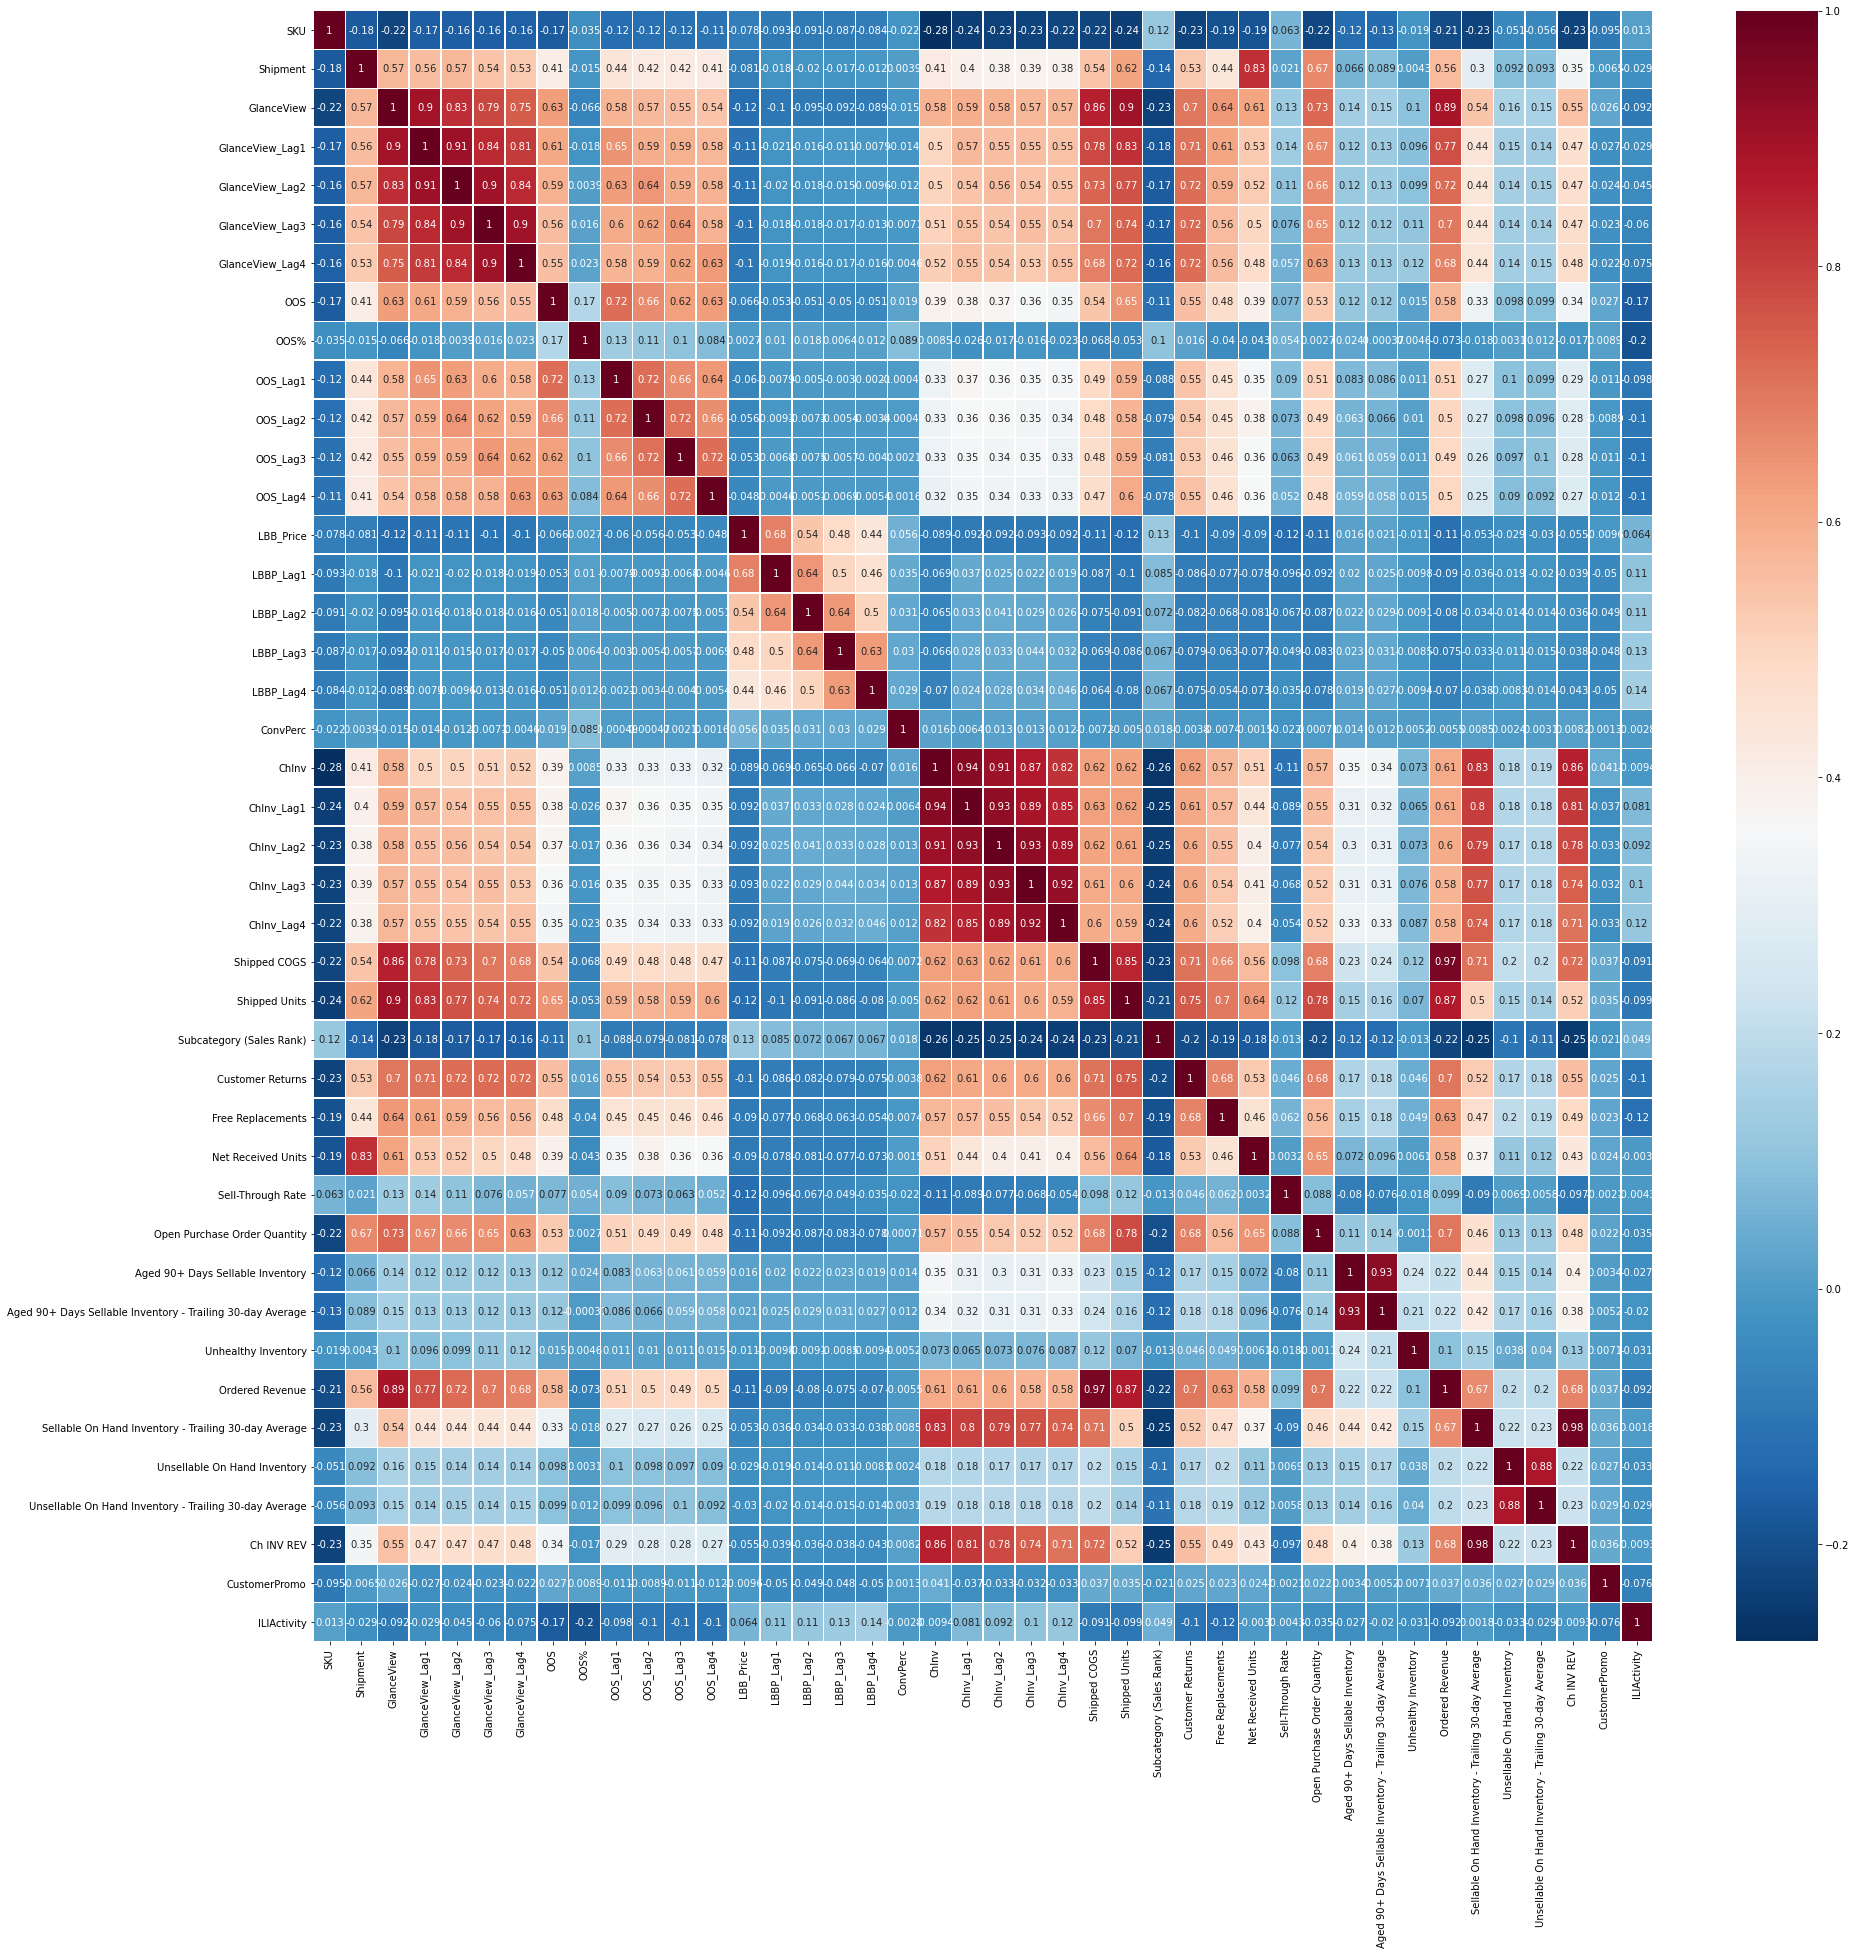

In [167]:
import seaborn as sb
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,30))
sb.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,linewidths=0.5, ax=ax)

In [168]:
pearson.to_csv("Shipment_Correlation_Analysis_CustomerPromo_with_ILI_Activity.csv")

In [51]:
uniq_combs = Data1.SKU.unique()
uniq_combs

array([100000015, 100000017, 100000019, ..., 100009913, 100009914,
       100092696], dtype=int64)

In [52]:
#pearson.iloc[0]
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [53]:
from tqdm import tqdm_notebook as tqdm

forecast_length = 1

In [219]:
#Data1=Data1.dropna()
Data1.to_csv("Data1111.csv")
temp = Data1[(Data1.SKU==100180442)]
pear = temp.corr(method='pearson')
pear.iloc[1]
pear['Sku'] = 'fgfdg'
pear

SKU  Shipment  GlanceView  \
SKU                                                 NaN       NaN         NaN   
Shipment                                            NaN  1.000000   -0.310645   
GlanceView                                          NaN -0.310645    1.000000   
GlanceView_Lag1                                     NaN -0.244254    0.523364   
GlanceView_Lag2                                     NaN -0.349260   -0.207853   
GlanceView_Lag3                                     NaN -0.154150    0.203903   
GlanceView_Lag4                                     NaN -0.026890    0.211684   
OOS                                                 NaN  0.309126   -0.526228   
OOS%                                                NaN  0.408418   -0.321526   
OOS_Lag1                                            NaN  0.386750   -0.453166   
OOS_Lag2                                            NaN -0.090436   -0.212740   
OOS_Lag3                                            NaN -0.209830    0.225874   
OOS_Lag4                                            NaN -0.344858    0.458254   
LBB_Price                                           NaN  0.462223   -0.106572   
LBBP_Lag1                                           NaN -0.183780   -0.099225   
LBBP_Lag2                                           NaN -0.213379   -0.043181   
LBBP_Lag3                                           NaN  0.049777    0.138659   
LBBP_Lag4                                           NaN -0.136434   -0.094251   
ConvPerc                                            NaN -0.163297   -0.024028   
ChInv                                               NaN -0.754819   -0.053667   
ChInv_Lag1                                          NaN -0.393396   -0.124073   
ChInv_Lag2                                          NaN -0.644262   -0.235043   
ChInv_Lag3                                          NaN -0.674266    0.336683   
ChInv_Lag4                                          NaN -0.572568    0.285384   
Shipped COGS                                        NaN -0.511012    0.898211   
Shipped Units                                       NaN -0.509753    0.898357   
Subcategory (Sales Rank)                            NaN  0.194825   -0.597132   
Customer Returns                                    NaN  0.631955   -0.423304   
Free Replacements                                   NaN -0.182732   -0.119591   
Net Received Units                                  NaN  0.864842   -0.175242   
Sell-Through Rate                                   NaN -0.543214    0.889602   
Open Purchase Order Quantity                        NaN -0.324862   -0.478835   
Aged 90+ Days Sellable Inventory                    NaN -0.581734   -0.134419   
Aged 90+ Days Sellable Inventory - Trailing 30-...  NaN -0.380149    0.026970   
Unhealthy Inventory                                 NaN  0.037810   -0.197069   
Ordered Revenue                                     NaN -0.282204    0.966435   
Sellable On Hand Inventory - Trailing 30-day Av...  NaN -0.768265    0.018117   
Unsellable On Hand Inventory                        NaN -0.235153    0.001010   
Unsellable On Hand Inventory - Trailing 30-day ...  NaN -0.206962    0.325476   
Ch INV REV                                          NaN -0.754819   -0.053667   
CustomerPromo                                       NaN  0.248613    0.158167   
ILIActivity                                         NaN -0.503984   -0.079061   

                                                    GlanceView_Lag1  \
SKU                                                             NaN   
Shipment                                                  -0.244254   
GlanceView                                                 0.523364   
GlanceView_Lag1                                            1.000000   
GlanceView_Lag2                                           -0.079483   
GlanceView_Lag3                                            0.185208   
GlanceView_Lag4                                            0.044980   


# Lag Creation for all Measures

In [54]:
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [55]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Shipped Units",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Shipped Units_Lag1","lag_2" : "Shipped Units_Lag2", "lag_3" :"Shipped Units_Lag3","lag_4" :"Shipped Units_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [56]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Shipped COGS",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Shipped COGS_Lag1","lag_2" : "Shipped COGS_Lag2", "lag_3" :"Shipped COGS_Lag3","lag_4" :"Shipped COGS_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [57]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Subcategory (Sales Rank)",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Subcategory (Sales Rank)_Lag1","lag_2" : "Subcategory (Sales Rank)_Lag2", "lag_3" :"Subcategory (Sales Rank)_Lag3","lag_4" :"Subcategory (Sales Rank)_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [58]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Customer Returns",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Customer Returns_Lag1","lag_2" : "Customer Returns_Lag2", "lag_3" :"Customer Returns_Lag3","lag_4" :"Customer Returns_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [59]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Free Replacements",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Free Replacements_Lag1","lag_2" : "Free Replacements_Lag2", "lag_3" :"Free Replacements_Lag3","lag_4" :"Free Replacements_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [60]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Net Received Units",month_ascending=True,lag_vars_range=[1,2,3,4])
Data1 = Data1.rename(columns={"lag_1": "Net Received Units_Lag1","lag_2" : "Net Received Units_Lag2", "lag_3" :"Net Received Units_Lag3","lag_4" :"Net Received Units_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [61]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Open Purchase Order Quantity",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [62]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Aged 90+ Days Sellable Inventory",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [63]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Aged 90+ Days Sellable Inventory - Trailing 30-day Average",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [64]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Unhealthy Inventory",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [65]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Ordered Revenue",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [66]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Sellable On Hand Inventory - Trailing 30-day Average",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [67]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Unsellable On Hand Inventory - Trailing 30-day Average",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS', 'OOS%',
       'OOSlag_1', 'OOSlag_2', 'OOSlag_3', 'OOSlag_4', 'LBB_Price',
       'LBB_Pricelag_1', 'LBB_Pricelag_2', 'LBB_Pricelag_3', 'LBB_Pricelag_4',
       'ConvPerc', 'ChInv', 'ChInvlag_1', 'ChInvlag_2', 'ChInvlag_3',
       'ChInvlag_4', 'Shipped COGS', 'Shipped Units',
       'Subcategory (Sales Rank)', 'Version.[Version Name]_x',
       'Customer Returns', 'Free Replacements', 'Net Received Units',
       'Sell-Through Rate', 'Open Purchase Order Quantity',
       'Aged 90+ Days Sellable Inventory',
       'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
       'Unhealthy Inventory', 'Ordered Revenue',
       'Sellable On Hand Inventory - Trailing 30-day Average',
       'Unsellable On Hand Inventory',
       'Unsellable On Hand Inventory - Trailing 30-day Average', 'Ch INV REV',
       'Promotion.[Promotion ID]', 'Vers

In [70]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Unsellable On Hand Inventory",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS',
       ...
       'Ch INV REVlag_3', 'Ch INV REVlag_4', 'CustomerPromolag_1',
       'CustomerPromolag_2', 'CustomerPromolag_3', 'CustomerPromolag_4',
       'Unsellable On Hand Inventorylag_1',
       'Unsellable On Hand Inventorylag_2',
       'Unsellable On Hand Inventorylag_3',
       'Unsellable On Hand Inventorylag_4'],
      dtype='object', length=112)

In [68]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Ch INV REV",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Index(['SKU', 'Time', 'Date', 'Shipment', 'GlanceView', 'GlanceViewlag_1',
       'GlanceViewlag_2', 'GlanceViewlag_3', 'GlanceViewlag_4', 'OOS',
       ...
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_3',
       'Sellable On Hand Inventory - Trailing 30-day Averagelag_4',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_1',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_2',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_3',
       'Unsellable On Hand Inventory - Trailing 30-day Averagelag_4',
       'Ch INV REVlag_1', 'Ch INV REVlag_2', 'Ch INV REVlag_3',
       'Ch INV REVlag_4'],
      dtype='object', length=104)

In [76]:
Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="CustomerPromo",month_ascending=True,lag_vars_range=[1,2,3,4])
#Data1 = Data1.rename(columns={"lag_1": "Sell-Through Rate_Lag1","lag_2" : "Sell-Through Rate_Lag2", "lag_3" :"Sell-Through Rate_Lag3","lag_4" :"Sell-Through Rate_Lag4"})
Data1.columns

Data1 = create_lag_variables(Data1,date_column="Date",grouped_on="SKU",shifting_var="Sell-Through Rate",month_ascending=True,lag_vars_range=[1,2,3,4])


In [71]:
Data1.to_csv("Data1_Lag_Columns_v1_Sellout.csv")

In [72]:
pear['GlanceView_Lag4']['GlanceView_Lag4']

NameError: name 'pear' is not defined

In [73]:
uniq_combs = Data1.SKU.unique()
uniq_combs

array([100000015, 100000017, 100000019, ..., 100009913, 100009914,
       100092696], dtype=int64)

In [77]:
names = Data1.columns
#names = np.array(subset_df.columns)
names = names.tolist()
#del names[0]
names.remove("Time")
names.remove("Date")
names.remove("SKU")
names.remove("Version.[Version Name]_x")
names.remove("Version.[Version Name]_y")
names.remove("Promotion.[Promotion ID]")
names.remove("Version.[Version Name]")
#names.remove("C")
#names = np.array(names)
names

['Shipment',
 'GlanceView',
 'GlanceViewlag_1',
 'GlanceViewlag_2',
 'GlanceViewlag_3',
 'GlanceViewlag_4',
 'OOS',
 'OOS%',
 'OOSlag_1',
 'OOSlag_2',
 'OOSlag_3',
 'OOSlag_4',
 'LBB_Price',
 'LBB_Pricelag_1',
 'LBB_Pricelag_2',
 'LBB_Pricelag_3',
 'LBB_Pricelag_4',
 'ConvPerc',
 'ChInv',
 'ChInvlag_1',
 'ChInvlag_2',
 'ChInvlag_3',
 'ChInvlag_4',
 'Shipped COGS',
 'Shipped Units',
 'Subcategory (Sales Rank)',
 'Customer Returns',
 'Free Replacements',
 'Net Received Units',
 'Sell-Through Rate',
 'Open Purchase Order Quantity',
 'Aged 90+ Days Sellable Inventory',
 'Aged 90+ Days Sellable Inventory - Trailing 30-day Average',
 'Unhealthy Inventory',
 'Ordered Revenue',
 'Sellable On Hand Inventory - Trailing 30-day Average',
 'Unsellable On Hand Inventory',
 'Unsellable On Hand Inventory - Trailing 30-day Average',
 'Ch INV REV',
 'CustomerPromo',
 'ILIActivity',
 'Shipped Unitslag_1',
 'Shipped Unitslag_2',
 'Shipped Unitslag_3',
 'Shipped Unitslag_4',
 'Shipped COGSlag_1',
 'Shipped

In [78]:
import numpy as np

In [79]:
result_list1 = []
for SKU in tqdm(uniq_combs):
    df = pd.DataFrame()
    df["SKU"] = [SKU for _ in range(forecast_length)]
    #df["ts_id"] = "1621312_7UP_Belgium"
    #print(df)
    # SARIMA
    subset_df = Data1[(Data1.SKU == SKU)]
    #subset_df = subset_df.fillna(0)
    subset_df['SKU'] = SKU
    #print(subset_df)
    pearson_df = subset_df.corr(method='pearson')
    df['Item'] = SKU   
    #df['']
    names = Data1.columns
    names = np.array(subset_df.columns)
    names = names.tolist()
    #del names[0]
    names.remove("Time")
    names.remove("Date")
    names.remove("SKU")
    names.remove("Version.[Version Name]_x")
    names.remove("Version.[Version Name]_y")
    names.remove("Promotion.[Promotion ID]")
    names.remove("Version.[Version Name]")
    #names.remove("C")
    #names = np.array(names)
    names
    for names in tqdm(names):
        print(names)
        if(names!="C"):
            df[names] = pearson_df['Shipment'][names]

    #print(pearson_df)
    #print("Corelation", pearson_df.iloc[1])
    #df["corr"] = pearson_df.iloc[2]
  
    
  
    result_list1.append(df)

<ipython-input-79-78e4344f8972>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for SKU in tqdm(uniq_combs):


  0%|          | 0/1014 [00:00<?, ?it/s]

<ipython-input-79-78e4344f8972>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['SKU'] = SKU
<ipython-input-79-78e4344f8972>:29: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for names in tqdm(names):


  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

  0%|          | 0/109 [00:00<?, ?it/s]

Shipment
GlanceView
GlanceViewlag_1
GlanceViewlag_2
GlanceViewlag_3
GlanceViewlag_4
OOS
OOS%
OOSlag_1
OOSlag_2
OOSlag_3
OOSlag_4
LBB_Price
LBB_Pricelag_1
LBB_Pricelag_2
LBB_Pricelag_3
LBB_Pricelag_4
ConvPerc
ChInv
ChInvlag_1
ChInvlag_2
ChInvlag_3
ChInvlag_4
Shipped COGS
Shipped Units
Subcategory (Sales Rank)
Customer Returns
Free Replacements
Net Received Units
Sell-Through Rate
Open Purchase Order Quantity
Aged 90+ Days Sellable Inventory
Aged 90+ Days Sellable Inventory - Trailing 30-day Average
Unhealthy Inventory
Ordered Revenue
Sellable On Hand Inventory - Trailing 30-day Average
Unsellable On Hand Inventory
Unsellable On Hand Inventory - Trailing 30-day Average
Ch INV REV
CustomerPromo
ILIActivity
Shipped Unitslag_1
Shipped Unitslag_2
Shipped Unitslag_3
Shipped Unitslag_4
Shipped COGSlag_1
Shipped COGSlag_2
Shipped COGSlag_3
Shipped COGSlag_4
Subcategory (Sales Rank)lag_1
Subcategory (Sales Rank)lag_2
Subcategory (Sales Rank)lag_3
Subcategory (Sales Rank)lag_4
Customer Returnslag

In [ ]:
df.drop_duplicates(subset=['brand'])

In [80]:
prediction_df1 = pd.concat(result_list1, sort=False)
#prediction_df1 = prediction_df1 = np.where(prediction_df1['SARIMAX_Predictions'] < 0, 0,prediction_df1['SARIMAX_Predictions'])
pred_path = os.path.join("NBTY_predictions",'prophet')
if not os.path.exists(pred_path):
    os.makedirs(pred_path)

prediction_df1.to_csv(os.path.join(pred_path,'Sellout_Correlation_SKUWise_2903.csv'))
pred_path

'NBTY_predictions\\prophet'

In [314]:
result_list1

[         SKU       Item
 0  100003796  100003796,
          SKU       Item
 0  100003798  100003798,
          SKU       Item
 0  100003808  100003808,
          SKU       Item
 0  100003809  100003809,
          SKU       Item
 0  100003811  100003811,
          SKU       Item
 0  100003816  100003816,
          SKU       Item
 0  100003822  100003822,
          SKU       Item
 0  100003831  100003831,
          SKU       Item
 0  100003839  100003839,
          SKU       Item
 0  100003849  100003849,
          SKU       Item
 0  100003852  100003852,
          SKU       Item
 0  100003854  100003854,
          SKU       Item
 0  100003861  100003861,
          SKU       Item
 0  100003862  100003862,
          SKU       Item
 0  100003864  100003864,
          SKU       Item
 0  100003866  100003866,
          SKU       Item
 0  100003884  100003884,
          SKU       Item
 0  100003885  100003885,
          SKU       Item
 0  100003892  100003892,
          SKU       Item
 0  10